In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

import Cpm as cpm
import MovingAverage as ma
import RSI as rsi
import ROC as roc
import CCI as cci
import BollingerBands as bb
import MACD as macd
import ESN_Signals
import ESN_GA

importlib.reload(cpm)
importlib.reload(ma)
importlib.reload(rsi)
importlib.reload(roc)
importlib.reload(cci)
importlib.reload(bb)
importlib.reload(macd)
importlib.reload(ESN_Signals)
importlib.reload(ESN_GA)

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

c:\Users\kki69\AppData\Local\Programs\Python\Python311\Lib\site-packages\backtesting\_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
df = yf.download('AAPL', start='2015-01-01', end='2025-07-18')
df.columns = [col[0] for col in df.columns]

print(df.info())
print(df.head())

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2650 entries, 2015-01-02 to 2025-07-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2650 non-null   float64
 1   High    2650 non-null   float64
 2   Low     2650 non-null   float64
 3   Open    2650 non-null   float64
 4   Volume  2650 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 124.2 KB
None
                Close       High        Low       Open     Volume
Date                                                             
2015-01-02  24.261044  24.729267  23.821668  24.718171  212818400
2015-01-05  23.577572  24.110148  23.391171  24.030261  257142000
2015-01-06  23.579800  23.839430  23.218091  23.641933  263188400
2015-01-07  23.910435  24.010292  23.677432  23.788385  160423600
2015-01-08  24.829128  24.886824  24.121246  24.238858  237458000


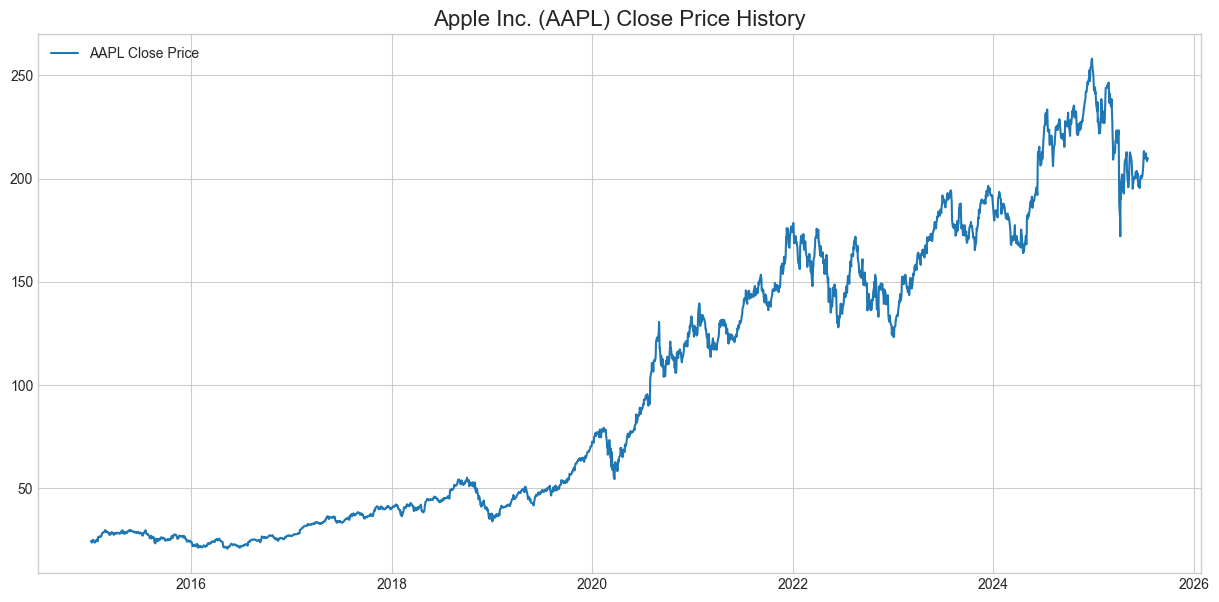

In [3]:
plt.figure(figsize=(15, 7))
plt.plot(df['Close'], label='AAPL Close Price')
plt.title('Apple Inc. (AAPL) Close Price History', fontsize=16)
plt.legend()
plt.show()

In [4]:
def extract_local_extrema(prices_series):
    critical_points = []
    if len(prices_series) < 2: return critical_points
    critical_points.append((prices_series.index[0], float(prices_series.iloc[0])))
    prices_values = prices_series.values
    indices = prices_series.index
    for i in range(1, len(prices_values) - 1):
        if (prices_values[i] > prices_values[i-1] and prices_values[i] > prices_values[i+1]):
            critical_points.append((indices[i], float(prices_values[i])))
        elif (prices_values[i] < prices_values[i-1] and prices_values[i] < prices_values[i+1]):
            critical_points.append((indices[i], float(prices_values[i])))
    critical_points.append((prices_series.index[-1], float(prices_series.iloc[-1])))
    critical_points = sorted(list(set(critical_points)), key=lambda x: x[0])
    return critical_points

cpm.extract_local_extrema = extract_local_extrema
print("✅ CPM 모듈의 extract_local_extrema 함수가 노트북 내에서 성공적으로 재정의되었습니다.")

✅ CPM 모듈의 extract_local_extrema 함수가 노트북 내에서 성공적으로 재정의되었습니다.


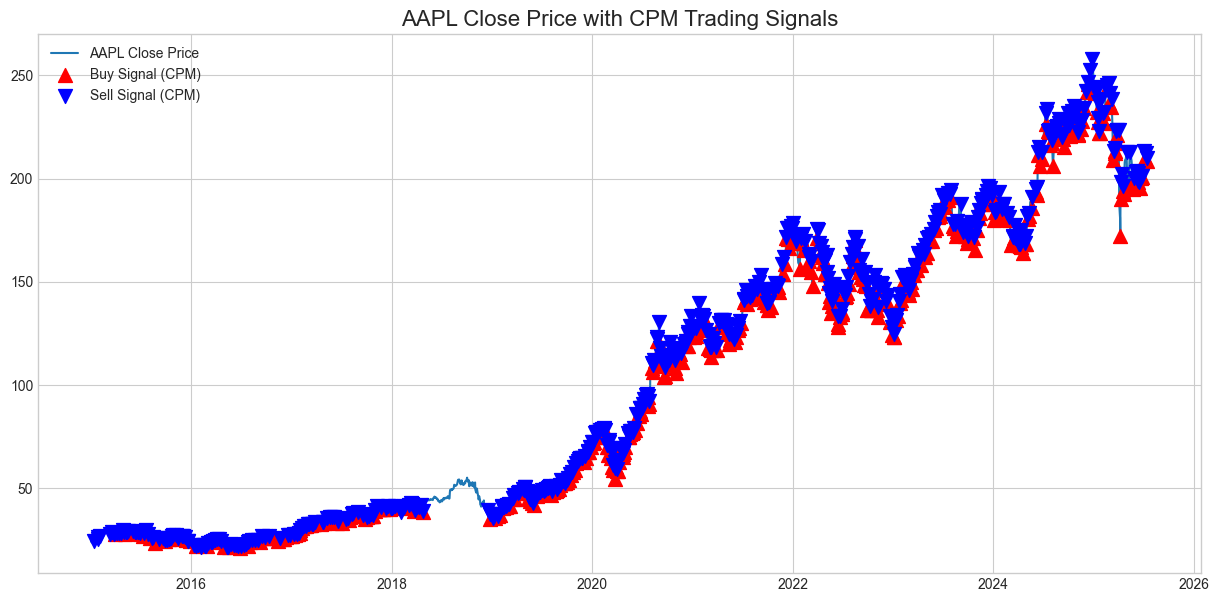

In [5]:
cpm_points, df_with_cpm = cpm.cpm_model(df, column='Close', P=0.05, T=5)

plt.figure(figsize=(15, 7))
plt.plot(df_with_cpm['Close'], label='AAPL Close Price', zorder=1)
buy_signals = df_with_cpm[df_with_cpm['cpm_point_type'] == -1]
sell_signals = df_with_cpm[df_with_cpm['cpm_point_type'] == 1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='red', s=100, label='Buy Signal (CPM)', zorder=2)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='blue', s=100, label='Sell Signal (CPM)', zorder=2)
plt.title('AAPL Close Price with CPM Trading Signals', fontsize=16)
plt.legend()
plt.show()

In [6]:
total_len = len(df_with_cpm)
train_end = int(total_len * 0.8)
train_df = df_with_cpm.iloc[:train_end]
print(f"개별 지표 최적화용 훈련 데이터: {len(train_df)}일")

개별 지표 최적화용 훈련 데이터: 2120일


In [7]:
print("--- 이동평균(MA) 파라미터 최적화 중... ---")
ma_best_params, _, _ = ma.run_MA_ga_optimization(train_df.copy())
print("\nMA 최적 파라미터:", ma_best_params)

--- 이동평균(MA) 파라미터 최적화 중... ---
이동평균 유전 알고리즘 실행 중 (샤프 지수 최적화)...


Backtest.run:   0%|          | 0/205 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/386 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/776 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/201 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/770 [00:00<?, ?bar/s]

gen	nevals	avg     	min  	max      
0  	50    	-940.024	-1000	-0.143398


Backtest.run:   0%|          | 0/959 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/772 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1056 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/203 [00:00<?, ?bar/s]

1  	44    	-860.027	-1000	0.599195 


Backtest.run:   0%|          | 0/1800 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/776 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/214 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/83 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/780 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/819 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/959 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/538 [00:00<?, ?bar/s]

2  	33    	-780.021	-1000	0.611387 


Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1914 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/202 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/771 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1915 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1719 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/791 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/771 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1753 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/776 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1067 [00:00<?, ?bar/s]

3  	39    	-619.903	-1000	0.613429 


Backtest.run:   0%|          | 0/1982 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1808 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/819 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1278 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1295 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/301 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/774 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/985 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1904 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/644 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/494 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1218 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/537 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/665 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1812 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/288 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1915 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/644 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/338 [00:00<?, ?bar/s]

4  	42    	-479.852	-1000	1.16632  


Backtest.run:   0%|          | 0/1625 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/542 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1982 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1310 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/646 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1326 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1468 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/774 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1332 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1332 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2052 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/557 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/781 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/626 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/532 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/776 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1725 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/296 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1908 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1275 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/775 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1807 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/778 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1408 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/206 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

5  	41    	-159.689	-1000	1.14997  


Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1821 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1275 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/775 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1816 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/781 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1275 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/817 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1291 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1332 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/641 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1817 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1333 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1466 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1895 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1459 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1332 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1329 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1982 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/817 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1003 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1905 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1906 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1908 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2000 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1906 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1885 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1816 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2066 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/778 [00:00<?, ?bar/s]

6  	44    	-39.4513	-1000	1.14997  


Backtest.run:   0%|          | 0/1908 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1907 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1908 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/776 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1059 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/784 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1805 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/778 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1812 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1329 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/789 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/206 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/772 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2027 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1722 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1980 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1468 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1329 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1466 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1979 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1906 [00:00<?, ?bar/s]

7  	37    	-79.4503	-1000	1.14997  


Backtest.run:   0%|          | 0/1904 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1722 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1905 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1723 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1905 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1408 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/776 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/769 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/773 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1981 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/779 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2002 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2000 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1982 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1408 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1906 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2000 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1909 [00:00<?, ?bar/s]

8  	42    	-59.3765	-1000	1.20395  


Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1820 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1906 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2027 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1332 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1908 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1798 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1326 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1333 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1333 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1980 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2002 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1332 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

9  	37    	0.712261	0.0121452	1.35473  


Backtest.run:   0%|          | 0/1981 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2027 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1913 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1907 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/776 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1909 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1914 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2000 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1907 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1910 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/196 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1909 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2002 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1981 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1981 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1067 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1909 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

10 	40    	-19.3352	-1000    	1.14997  


Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2002 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2027 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1003 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1909 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1906 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1910 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1910 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1326 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2000 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1979 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1327 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1981 [00:00<?, ?bar/s]

11 	36    	0.787971	0.0570657	1.14997  


Backtest.run:   0%|          | 0/494 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2053 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1982 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1761 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1981 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1329 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1327 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2068 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2053 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1905 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1327 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2031 [00:00<?, ?bar/s]

12 	42    	-19.2347	-1000    	1.28996  


Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1812 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2000 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2026 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1276 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1276 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1982 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1981 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1828 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1909 [00:00<?, ?bar/s]

13 	40    	-19.1666	-1000    	1.47029  


Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1643 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1643 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1813 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2000 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1327 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1895 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1909 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1943 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

14 	38    	-19.0311	-1000    	1.51257  


Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2000 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1910 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2000 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1427 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1003 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1909 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1944 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1909 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/497 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

15 	43    	-19.0266	-1000    	1.462    


Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/542 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/818 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1815 [00:00<?, ?bar/s]

16 	35    	1.10994 	0.468447 	1.42985  


Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1982 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1003 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

17 	35    	1.15814 	0.352093 	1.42985  


Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1643 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/818 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1725 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

18 	40    	-38.875 	-1000    	1.42985  


Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1003 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1332 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1643 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

19 	40    	1.15283 	0.356589 	1.48698  


Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

20 	43    	1.20976 	0.316894 	1.4898   


Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1480 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1982 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1909 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

21 	38    	-18.7804	-1000    	1.51623  


Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1643 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1643 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

22 	40    	1.26508 	0.614568 	1.51623  


Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1914 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1730 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1643 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

23 	36    	1.27345 	0.184133 	1.51623  


Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/818 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1643 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

24 	41    	1.24435 	0.477087 	1.52157  


Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1982 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1815 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1896 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

25 	45    	1.25214 	0.570566 	1.52848  

--- 이동평균 유전 알고리즘 결과 ---
최적의 파라미터 (N, n, a, b, c, atr, tp_r): [89, 5, 1.7555776999159516, 0.19497490567863374, 0.5027920948638316, 3.607566903820936, 3.131661931870086]
최고의 피트니스 (Sharpe Ratio 기반): 1.528481272230439

MA 최적 파라미터: [89, 5, 1.7555776999159516, 0.19497490567863374, 0.5027920948638316, 3.607566903820936, 3.131661931870086]


In [8]:
print("\n--- RSI 파라미터 최적화 중... ---")
rsi_best_params, _, _ = rsi.run_RSI_ga_optimization(train_df.copy())
print("\nRSI 최적 파라미터:", rsi_best_params)


--- RSI 파라미터 최적화 중... ---
RSI 유전 알고리즘 실행 중 (샤프 지수 최적화)...


Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1340 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1863 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1863 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

gen	nevals	avg     	min  	max    
0  	50    	-319.978	-1000	1.10415


Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1863 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1117 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

1  	29    	-79.8542	-1000	0.727973


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

2  	40    	-99.6923	-1000	0.727973


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1117 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

3  	39    	-19.5905	-1000	0.727973


Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1117 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1117 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

4  	40    	-59.5312	-1000	0.727973


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

5  	41    	0.539992	-0.606827	0.783655


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

6  	43    	0.594318	-0.606827	1.06849 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

7  	43    	0.657886	-0.606827	1.11352 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

8  	40    	0.726722	-0.606003	1.11352 


Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

9  	40    	0.801391	-0.606827	1.15917 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

10 	40    	0.951213	0.0835651	1.15644 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1117 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

11 	42    	-19.1284	-1000    	1.1557  


Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

12 	38    	1.02535 	-0.365253	1.15698 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

13 	36    	1.01705 	0.169224 	1.1586  


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

14 	41    	0.93793 	-0.133228	1.1586  


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

15 	43    	1.05467 	0.176294 	1.15977 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

16 	42    	1.0082  	-0.00814485	1.1595  


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

17 	40    	0.997504	-0.606815  	1.1595  


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

18 	35    	-19.0336	-1000      	1.1595  


Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

19 	34    	1.07896 	0.201643   	1.15925 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

20 	33    	1.03885 	-0.159023  	1.15925 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

21 	38    	1.03179 	-0.133316  	1.16011 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

22 	24    	1.11054 	0.162599   	1.16011 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

23 	35    	1.00679 	0.0739475  	1.16018 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

24 	41    	1.07123 	-0.0236856 	1.16018 


Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

25 	39    	1.0564  	0.190422   	1.16019 

--- RSI 유전 알고리즘 결과 ---
최적의 파라미터 (tp, ob, os, atr, tp_r): [25, 79.9958713657465, 38.05071198796645, 4.138007262385063, 4.171090394368945]
최고의 피트니스 (Sharpe Ratio 기반): 1.1601875584179484

RSI 최적 파라미터: [25, 79.9958713657465, 38.05071198796645, 4.138007262385063, 4.171090394368945]


In [9]:
print("\n--- ROC 파라미터 최적화 중... ---")
roc_best_params, _, _ = roc.run_roc_ga_optimization(train_df.copy())
print("\nROC 최적 파라미터:", roc_best_params)


--- ROC 파라미터 최적화 중... ---
ROC 유전 알고리즘 실행 중 (샤프 지수 최적화)...


Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2076 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2076 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2070 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2080 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2075 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2071 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2080 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2070 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2079 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2080 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2104 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2076 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2104 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2071 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

gen	nevals	avg     	min      	max     
0  	50    	0.542337	-0.300696	0.986957


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2070 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

1  	37    	0.698163	0.290268 	0.972575


Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2095 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

2  	35    	0.744941	0.308865 	0.981299


Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2074 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2104 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

3  	34    	0.754935	0.0391588	1.01241 


Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2104 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

4  	41    	0.793398	0.0153161	1.16183 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2080 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

5  	41    	0.869659	0.360179 	1.11499 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

6  	39    	0.990071	0.523425 	1.16022 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

7  	35    	1.04821 	0.609812 	1.16022 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

8  	40    	1.04928 	0.512815 	1.16022 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

9  	46    	1.02729 	0.560992 	1.16473 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

10 	45    	1.03526 	0.476586 	1.18134 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

11 	38    	1.08904 	0.562412 	1.18134 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

12 	39    	1.10074 	0.579769 	1.18154 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2104 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

13 	50    	1.09302 	0.489033 	1.18092 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

14 	45    	1.13076 	0.605159 	1.18133 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

15 	42    	1.14494 	0.67201  	1.18133 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

16 	44    	1.12878 	0.3544   	1.18133 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

17 	35    	1.1697  	0.855402 	1.18152 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

18 	34    	1.13497 	0.603337 	1.18188 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

19 	39    	1.12596 	0.583909 	1.18188 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

20 	43    	1.15277 	0.489383 	1.1819  


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

21 	35    	1.1638  	0.492311 	1.1819  


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

22 	42    	1.15521 	0.71611  	1.18335 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2104 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

23 	40    	1.14232 	0.666616 	1.18335 


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

24 	41    	1.12317 	0.490508 	1.1841  


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

25 	36    	1.15597 	0.755096 	1.18322 

--- ROC 유전 알고리즘 결과 ---
최적의 파라미터 (period, thres, atr, tp_r): [13, 1.0033006280835184, 2.0862583837487354, 5.0]
최고의 피트니스 (Sharpe Ratio 기반): 1.1840981956392371

ROC 최적 파라미터: [13, 1.0033006280835184, 2.0862583837487354, 5.0]


In [10]:
# 셀 11: CCI 파라미터 최적화
print("\n--- CCI 파라미터 최적화 중... ---")
cci_best_params, _, _ = cci.run_CCI_ga_optimization(train_df.copy())
print("\nCCI 최적 파라미터:", cci_best_params)


--- CCI 파라미터 최적화 중... ---
CCI 유전 알고리즘 실행 중 (샤프 지수 최적화)...


Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2069 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2071 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2076 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2076 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

gen	nevals	avg      	min      	max     
0  	50    	0.0238248	-0.541457	0.545305


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2076 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2076 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2060 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

1  	38    	0.19522  	-0.667525	0.679011


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2060 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

2  	45    	0.210164 	-0.767134	0.679011


Backtest.run:   0%|          | 0/2069 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2060 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

3  	32    	0.374019 	-0.250642	0.679011


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

4  	39    	0.453338 	-0.254579	0.932779


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2060 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

5  	38    	0.488287 	-0.566338	0.932779


Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2060 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2060 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

6  	41    	0.421625 	-0.420857	0.944098


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

7  	45    	0.412215 	-0.453225	0.944098


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

8  	40    	0.427456 	-0.341635	0.944098


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

9  	40    	0.508671 	-0.0793255	0.95934 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

10 	41    	0.568378 	-0.230833 	1.03258 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

11 	35    	0.684609 	-0.581083 	1.03258 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

12 	35    	0.708057 	-0.575717 	1.03258 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

13 	41    	0.770033 	-0.00442315	1.04306 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

14 	44    	0.823821 	-0.27722   	1.06378 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

15 	40    	0.845488 	-0.0549167 	1.07591 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

16 	38    	0.97919  	0.501734   	1.07591 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

17 	39    	0.935325 	0.140052   	1.0779  


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

18 	39    	0.995319 	0.477881   	1.07835 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

19 	38    	0.954345 	0.216067   	1.08978 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

20 	40    	0.908037 	0.30238    	1.08978 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

21 	41    	0.968041 	0.0713109  	1.08978 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

22 	35    	0.986286 	0.386928   	1.08978 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

23 	39    	0.971422 	0.223656   	1.08978 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

24 	39    	0.967445 	-0.144318  	1.08978 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

25 	41    	0.997139 	-0.156855  	1.08978 

--- CCI 유전 알고리즘 결과 ---
최적의 파라미터 (tp, ob, os, atr, tp_r): [84, 208.10354640007014, -126.88030660782275, 3.026784348702616, 4.987526489078839]
최고의 피트니스 (Sharpe Ratio 기반): 1.0897774593189449

CCI 최적 파라미터: [84, 208.10354640007014, -126.88030660782275, 3.026784348702616, 4.987526489078839]


In [11]:
print("\n--- MACD 파라미터 최적화 중... ---")
macd_best_params, _, _ = macd.run_MACD_ga_optimization(train_df.copy())
print("\nMACD 최적 파라미터:", macd_best_params)


--- MACD 파라미터 최적화 중... ---
MACD 유전 알고리즘 실행 중 (샤프 지수 최적화)...


Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2052 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2052 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

gen	nevals	avg     	min     	max    
0  	50    	0.860137	0.446449	1.21373


Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

1  	38    	0.910449	0.367905	1.21373


Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

2  	41    	0.990713	0.641396	1.19667


Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

3  	46    	0.999527	0.64522 	1.19667


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2051 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

4  	39    	1.0174  	0.652791	1.18679


Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

5  	44    	1.03953 	0.637282	1.27678


Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

6  	36    	1.06289 	0.583084	1.27678


Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

7  	44    	1.10676 	0.727574	1.26947


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

8  	39    	1.09635 	0.400288	1.28266


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

9  	39    	1.13321 	0.760563	1.27124


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

10 	38    	1.13658 	0.726854	1.27419


Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

11 	37    	1.17765 	0.703522	1.27419


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

12 	35    	1.18372 	0.813803	1.27901


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

13 	43    	1.19456 	0.77596 	1.27821


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

14 	40    	1.17937 	0.677183	1.27796


Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

15 	45    	1.22343 	0.781393	1.28176


Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

16 	41    	1.22597 	0.698787	1.28058


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

17 	36    	1.25077 	1.09095 	1.28094


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

18 	41    	1.23    	0.712667	1.28094


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

19 	38    	1.21304 	0.808052	1.28548


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

20 	39    	1.25987 	1.08423 	1.28548


Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

21 	41    	1.23069 	0.751631	1.28245


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

22 	41    	1.22455 	0.812427	1.28293


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

23 	43    	1.22491 	0.812413	1.28614


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

24 	35    	1.22884 	0.750137	1.28614


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

25 	37    	1.2505  	0.996819	1.28614

--- MACD 유전 알고리즘 결과 ---
최적의 파라미터 (fast, slow, sig, atr, tp_r): [14, 34, 16, 4.689575768015762, 1.956068612956585]
최고의 피트니스 (Sharpe Ratio 기반): 1.2861371187129618

MACD 최적 파라미터: [14, 34, 16, 4.689575768015762, 1.956068612956585]


In [12]:
print("\n--- 볼린저 밴드(BB) 파라미터 최적화 중... ---")
bb_best_params, _, _ = bb.run_BB_ga_optimization(train_df.copy())
print("\nBB 최적 파라미터:", bb_best_params)


--- 볼린저 밴드(BB) 파라미터 최적화 중... ---
볼린저 밴드 유전 알고리즘 실행 중 (샤프 지수 최적화)...


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1340 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/822 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

gen	nevals	avg     	min  	max     
0  	50    	-60.2166	-1000	0.226592


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

1  	39    	-40.1176	-1000	0.20029 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

2  	37    	-20.0597	-1000	0.21522 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

3  	39    	0.0422609	-0.654695	0.284347


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

4  	38    	0.0756499	-0.310071	0.32075 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

5  	39    	0.105917 	-0.244339	0.34606 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

6  	37    	0.154891 	-0.352192	0.34606 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

7  	42    	0.141017 	-0.550863	0.381922


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

8  	30    	0.165781 	-0.373162	0.340001


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

9  	40    	0.149248 	-0.53719 	0.36652 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

10 	35    	0.184909 	-0.672011	0.36652 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

11 	42    	0.214795 	-0.209504	0.378666


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

12 	40    	0.192792 	-0.422654	0.378666


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

13 	38    	0.242906 	-0.227118	0.383138


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

14 	40    	0.257106 	-0.459278	0.384333


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

15 	37    	0.31109  	-0.143873	0.384724


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

16 	43    	0.29671  	-0.594349	0.391236


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

17 	41    	0.30022  	-0.272675	0.391236


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

18 	38    	0.341144 	-0.39917 	0.38863 


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

19 	44    	0.298121 	-0.362105	0.396523


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

20 	40    	0.349339 	-0.337468	0.395424


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

21 	37    	0.375692 	0.161864 	0.394892


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

22 	42    	0.338857 	-0.284203	0.397191


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

23 	40    	0.340616 	-0.338175	0.399129


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

24 	43    	0.352711 	-0.184303	0.398775


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

25 	42    	0.352005 	-0.154126	0.399478

--- 볼린저 밴드 유전 알고리즘 결과 ---
최적의 파라미터 (tp, devup, devdn, atr, tp_r): [77, 2.859928746896948, 2.3208426511316027, 3.0757093726872844, 1.7533735852381382]
최고의 피트니스 (Sharpe Ratio 기반): 0.3994779469021646

BB 최적 파라미터: [77, 2.859928746896948, 2.3208426511316027, 3.0757093726872844, 1.7533735852381382]


In [13]:
print("\n--- 전체 데이터프레임에 신호 컬럼 추가 중... ---")

# --- 수정: 모든 파라미터를 언패킹하되, 사용하지 않는 값은 _ 로 처리 ---
# 최적 파라미터 언패킹
final_N, final_n, final_a, final_b, final_c, _, _ = ma_best_params
final_x, final_overbought, final_oversold, _, _ = rsi_best_params
final_roc_period, final_roc_threshold, _, _ = roc_best_params
cci_timeperiod, cci_overbought, cci_oversold, _, _ = cci_best_params
bb_timeperiod, bb_nbdevup, bb_nbdevdn, _, _ = bb_best_params
macd_fast, macd_slow, macd_signal, _, _ = macd_best_params

# 전체 데이터프레임에 대한 신호 생성 (이 부분은 변경 없음)
ma_signals_full = ma.generate_MA_signals(df_with_cpm, final_N, final_n, final_a, final_b, final_c)
rsi_signals_full = rsi.generate_RSI_signals(df_with_cpm, final_x, final_overbought, final_oversold)
roc_signals_full = roc.generate_roc_signals(df_with_cpm, final_roc_period, final_roc_threshold)
cci_signals_full = cci.generate_CCI_signals(df_with_cpm, cci_timeperiod, cci_overbought, cci_oversold)
bb_signals_full = bb.generate_BB_signals(df_with_cpm, bb_timeperiod, bb_nbdevup, bb_nbdevdn)
macd_signals_full = macd.generate_MACD_signals(df_with_cpm, macd_fast, macd_slow, macd_signal)

# --- 수정: 신호 추가 로직을 가장 안정적인 방식으로 통일 ---
# 생성된 신호를 df_with_cpm에 새로운 컬럼으로 추가
all_signals = {
    'MA_Signals': ma_signals_full,
    'RSI_Signals': rsi_signals_full,
    'ROC_Signals': roc_signals_full,
    'CCI_Signals': cci_signals_full,
    'BB_Signals': bb_signals_full,
    'MACD_Signals': macd_signals_full
}

for col_name, signals_df in all_signals.items():
    df_with_cpm[col_name] = 0
    if not signals_df.empty:
        signal_map = signals_df.set_index('Index')['Type'].map({'BUY': -1, 'SELL': 1})
        # .reindex(df_with_cpm.index)를 사용하여 인덱스를 맞추고 .fillna(0)로 빈 값을 채움
        df_with_cpm[col_name] = signal_map.reindex(df_with_cpm.index).fillna(0)

print("신호 컬럼 추가 완료.")
print("각 신호별 발생 횟수:")
print(df_with_cpm[['MA_Signals', 'RSI_Signals', 'ROC_Signals','CCI_Signals','BB_Signals','MACD_Signals']].ne(0).sum())


--- 전체 데이터프레임에 신호 컬럼 추가 중... ---
신호 컬럼 추가 완료.
각 신호별 발생 횟수:
MA_Signals       25
RSI_Signals       5
ROC_Signals     169
CCI_Signals      11
BB_Signals       22
MACD_Signals    137
dtype: int64


--- 피처(기술적 지표) 중요도 ---
ROC_Signals     0.228253
MACD_Signals    0.218020
BB_Signals      0.189617
RSI_Signals     0.168153
MA_Signals      0.108790
CCI_Signals     0.087166
dtype: float64


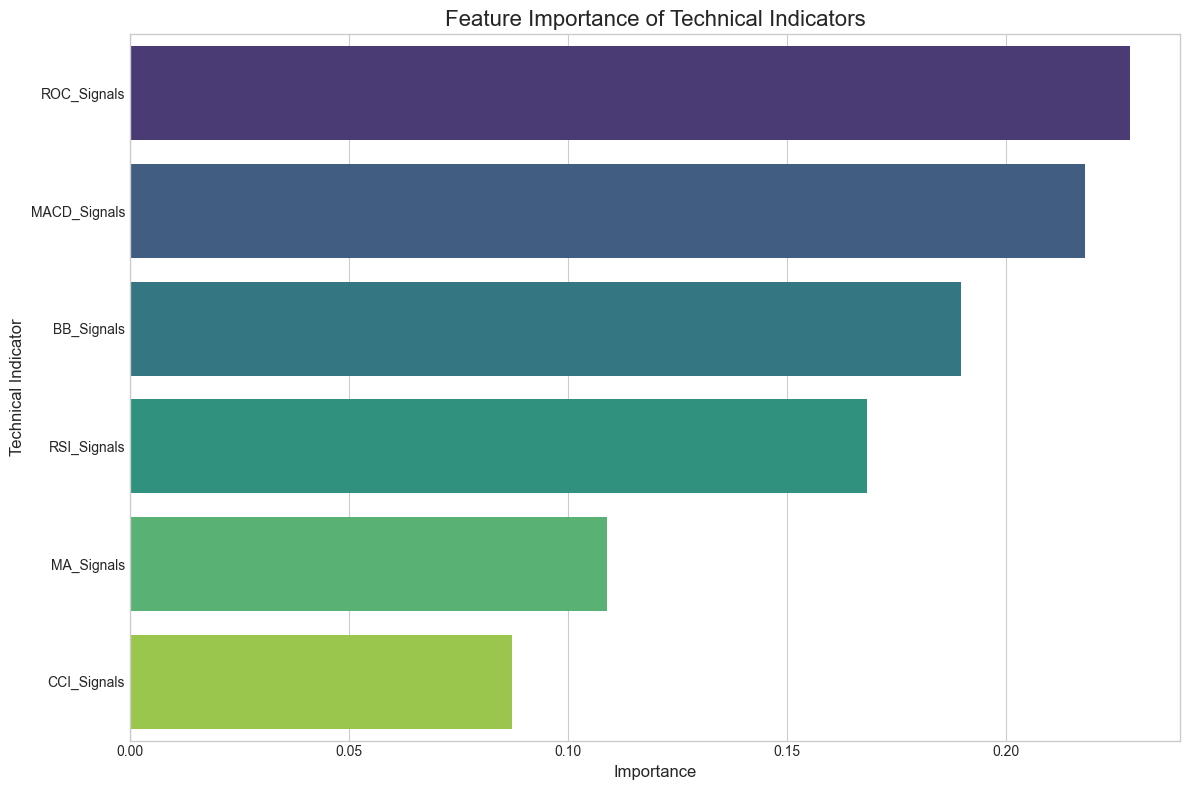

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# --- 1. 분석용 데이터 준비 ---
# ESN 모델과 동일한 훈련 데이터를 사용합니다.
# 단, NaN 값이 있는 행은 분석에서 제외합니다.
features = ['MA_Signals', 'RSI_Signals', 'ROC_Signals', 'CCI_Signals', 'BB_Signals', 'MACD_Signals']
target = 'cpm_point_type'

# ESN과 동일하게 Target을 한 칸 앞당겨 '미래'를 예측하도록 설정
df_analysis = df_with_cpm.copy()
df_analysis['Target'] = df_analysis[target].shift(-1)
df_analysis.dropna(subset=features + ['Target'], inplace=True)

# 훈련 데이터셋 정의 (기존 train_df와 동일한 구간 사용)
X_train_rf = df_analysis.loc[train_df.index, features].copy()
y_train_rf = df_analysis.loc[train_df.index, 'Target'].copy()


# --- 2. RandomForest 모델 초기화 및 훈련 ---
# ESN 대신, 피처 중요도 분석을 위해 RandomForest를 임시로 사용합니다.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_rf, y_train_rf)


# --- 3. 피처 중요도 추출 및 확인 ---
importances = rf_model.feature_importances_
feature_importance_df = pd.Series(importances, index=features).sort_values(ascending=False)

print("--- 피처(기술적 지표) 중요도 ---")
print(feature_importance_df)


# --- 4. 피처 중요도 시각화 ---
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_df.values, y=feature_importance_df.index, palette='viridis')
plt.title('Feature Importance of Technical Indicators', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Technical Indicator', fontsize=12)
plt.tight_layout()
plt.show()


In [15]:
# 사용할 기술적 지표 컬럼 이름 리스트
Technical_Signals = ['MA_Signals', 'RSI_Signals', 'ROC_Signals',  'CCI_Signals','BB_Signals','MACD_Signals']

# 변수명을 all_fold_stats 로 변경하여 모든 폴드의 통계를 받습니다.
best_params_cv, cv_returns, all_fold_stats, last_fold_signals = ESN_GA.esn_rolling_forward(
    df=df_with_cpm,
    technical_signals_list=Technical_Signals,
    n_splits_cv=5, 
    n_splits_forward=3,
    pop_size=50,
    num_generations=15,
    random_seed=42,
    initial_train_ratio=0.7 
)

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

11 	38    	38.2346 	42.1401	-100    	68.1238


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

12 	41    	20.8006 	66.4903	-100    	68.6471


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

13 	43    	27.8424 	60.1465	-100    	69.4963


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

14 	39    	46.1301 	50.5115	-100    	69.4963


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

15 	48    	40.0197 	61.4881	-100    	69.4963
Fold 3 최적 후보: [107.56297438499436, 0.9680471440000585, 0.6232784941418098, 0.46397209710089815, 3.13886817140402, 4.665381904110621]

--- CV Fold 4/5 (후보 파라미터 탐색) ---


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

gen	nevals	avg     	std    	min 	max    
0  	50    	-7.97713	31.3018	-100	72.8894


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

1  	41    	-2.49931	35.3207	-100	89.11  


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

2  	41    	9.44574 	27.8649	-49.6555	63.2538


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

3  	39    	6.60603 	44.4043	-100    	97.8207


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

4  	46    	1.74616 	48.5266	-100    	97.8207


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

5  	37    	16.2028 	51.615 	-100    	98.3721


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

6  	38    	36.6929 	47.4104	-100    	114.937


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

7  	39    	51.7992 	59.4633	-100    	136.329


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

8  	34    	78.2964 	48.7926	-54.3941	196.137


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

9  	36    	87.4757 	44.1922	-100    	136.329


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

10 	37    	115.863 	25.6114	35.009  	158.616


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

11 	43    	112.552 	45.6761	-42.0495	205.912


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

12 	43    	125.91  	32.4568	-15.498 	202.278


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

13 	40    	117.369 	40.8003	10.7392 	210.369


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

14 	43    	124.899 	38.7585	11.306  	215.63 


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

15 	43    	121.25  	52.7832	-8.68857	215.63 
Fold 4 최적 후보: [169.0157262453692, 0.9445538383891174, 0.3129604930506028, 0.41875629742323806, 4.453052870732762, 3.639519459250468]

--- CV Fold 5/5 (후보 파라미터 탐색) ---


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

gen	nevals	avg     	std    	min     	max    
0  	50    	-25.6156	26.1094	-84.7033	25.1676


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

1  	41    	-19.4444	21.7602	-100    	12.7162


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

2  	40    	-14.5561	24.8309	-100    	29.4178


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

3  	37    	-11.6809	27.9358	-100    	23.7225


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

4  	44    	-12.6002	25.6124	-100    	23.7225


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

5  	42    	-6.6386 	26.4679	-100    	29.0329


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

6  	41    	-1.79657	34.0631	-100    	29.0329


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

7  	37    	5.31361 	18.7198	-31.1977	29.0329


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

8  	37    	1.34745 	30.0919	-100    	29.4634


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

9  	42    	-0.539521	29.2151	-100    	29.4634


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

10 	41    	1.03999  	36.9139	-100    	29.4634


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

11 	41    	2.49647  	35.6009	-100    	34.5634


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

12 	42    	7.42554  	31.8941	-100    	33.6688


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

13 	44    	4.28368  	31.9778	-100    	33.8321


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

14 	44    	22.455   	15.1117	-41.8955	36.0574


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

15 	34    	26.2566  	14.5981	-38.0178	40.1153
Fold 5 최적 후보: [149.6567897932288, 0.7364830928900563, -0.2400350420290024, 0.466119270216383, 4.757340034452087, 3.156756502721018]

후보 파라미터 교차 평가 시작...
  -> 후보 1 평가 중...


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

  후보 1의 5개 Fold 평균 점수: 10.0165
  -> 후보 2 평가 중...


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

  후보 2의 5개 Fold 평균 점수: 17.7250
  -> 후보 3 평가 중...


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

  후보 3의 5개 Fold 평균 점수: 13.0364
  -> 후보 4 평가 중...


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

  후보 4의 5개 Fold 평균 점수: 25.1724
  -> 후보 5 평가 중...


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

  후보 5의 5개 Fold 평균 점수: 1.5298

교차 검증 기반 파라미터 최적화 완료!
최종 선택된 최적 파라미터: [169.0157262453692, 0.9445538383891174, 0.3129604930506028, 0.41875629742323806, 4.453052870732762, 3.639519459250468]
(후보 4의 평균 점수가 25.1724로 가장 높았습니다)


--- 3-분할 롤링 포워드 최종 성능 검증 시작 ---

--- Forward Fold 1/3 ---


Backtest.run:   0%|          | 0/250 [00:00<?, ?bar/s]


백테스팅 결과:
Start                     2022-05-13 00:00:00
End                       2023-06-02 00:00:00
Duration                    385 days 00:00:00
Exposure Time [%]                    44.15094
Equity Final [$]                  10648.50657
Equity Peak [$]                   10742.19354
Commissions [$]                     107.43158
Return [%]                            6.48507
Buy & Hold Return [%]                25.21014
Return (Ann.) [%]                     6.15734
Volatility (Ann.) [%]                18.62877
CAGR [%]                              4.19856
Sharpe Ratio                          0.33053
Sortino Ratio                         0.53223
Calmar Ratio                          0.26152
Alpha [%]                            -0.98819
Beta                                  0.29644
Max. Drawdown [%]                   -23.54438
Avg. Drawdown [%]                    -4.93364
Max. Drawdown Duration      297 days 00:00:00
Avg. Drawdown Duration       51 days 00:00:00
# Trades                

Backtest.run:   0%|          | 0/250 [00:00<?, ?bar/s]


백테스팅 결과:
Start                     2023-06-05 00:00:00
End                       2024-06-24 00:00:00
Duration                    385 days 00:00:00
Exposure Time [%]                    21.88679
Equity Final [$]                  10641.37924
Equity Peak [$]                   10776.80101
Commissions [$]                     118.75121
Return [%]                            6.41379
Buy & Hold Return [%]                12.94078
Return (Ann.) [%]                     6.08977
Volatility (Ann.) [%]                 11.8907
CAGR [%]                               4.1529
Sharpe Ratio                          0.51215
Sortino Ratio                         0.92893
Calmar Ratio                          0.80769
Alpha [%]                             2.92273
Beta                                  0.26977
Max. Drawdown [%]                    -7.53973
Avg. Drawdown [%]                    -3.08249
Max. Drawdown Duration      154 days 00:00:00
Avg. Drawdown Duration       43 days 00:00:00
# Trades                

Backtest.run:   0%|          | 0/250 [00:00<?, ?bar/s]


백테스팅 결과:
Start                     2024-06-25 00:00:00
End                       2025-07-16 00:00:00
Duration                    386 days 00:00:00
Exposure Time [%]                    12.07547
Equity Final [$]                  10300.53332
Equity Peak [$]                   11140.98034
Commissions [$]                     163.52773
Return [%]                            3.00533
Buy & Hold Return [%]               -10.08311
Return (Ann.) [%]                     2.85582
Volatility (Ann.) [%]                10.80914
CAGR [%]                              1.95193
Sharpe Ratio                           0.2642
Sortino Ratio                         0.46273
Calmar Ratio                          0.24048
Alpha [%]                             4.07475
Beta                                  0.10606
Max. Drawdown [%]                   -11.87543
Avg. Drawdown [%]                     -5.2192
Max. Drawdown Duration       64 days 00:00:00
Avg. Drawdown Duration       38 days 00:00:00
# Trades                

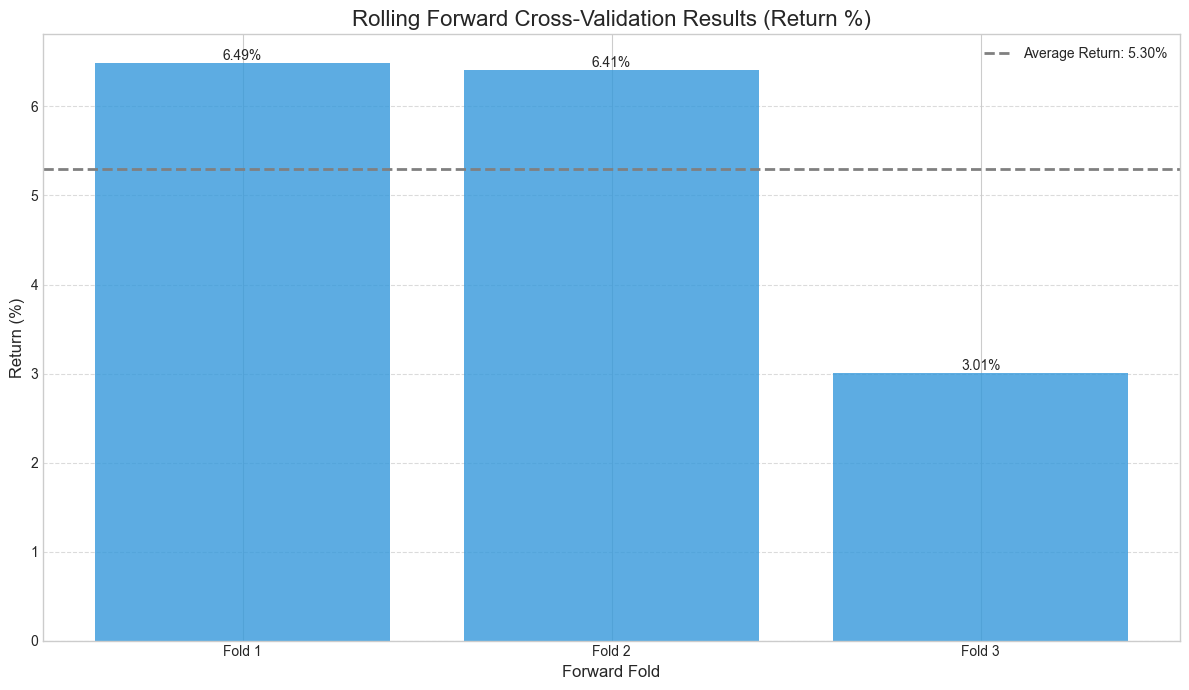


--- Forward Fold 1 Backtest Statistics (Full) ---
Start                                                   2022-05-13 00:00:00
End                                                     2023-06-02 00:00:00
Duration                                                  385 days 00:00:00
Exposure Time [%]                                                 44.150943
Equity Final [$]                                                10648.50657
Equity Peak [$]                                                10742.193538
Commissions [$]                                                  107.431579
Return [%]                                                         6.485066
Buy & Hold Return [%]                                             25.210141
Return (Ann.) [%]                                                  6.157336
Volatility (Ann.) [%]                                             18.628773
CAGR [%]                                                           4.198555
Sharpe Ratio                         

In [16]:
# 교차 검증 결과 시각화
if 'cv_returns' in locals() and cv_returns:
    fold_labels = [f'Fold {i+1}' for i in range(len(cv_returns))]
    mean_return = np.mean(cv_returns)
    
    plt.figure(figsize=(12, 7))
    colors = ['#3498db' if x >= 0 else '#e74c3c' for x in cv_returns]
    bars = plt.bar(fold_labels, cv_returns, color=colors, alpha=0.8)
    
    plt.axhline(mean_return, color='grey', linestyle='--', linewidth=2, label=f'Average Return: {mean_return:.2f}%')
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', 
                 va='bottom' if yval >=0 else 'top', ha='center', fontsize=10)

    plt.title('Rolling Forward Cross-Validation Results (Return %)', fontsize=16)
    plt.xlabel('Forward Fold', fontsize=12)
    plt.ylabel('Return (%)', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("cv_returns 변수가 없거나 비어있어 시각화를 진행할 수 없습니다.")

# --- 수정된 부분 ---
# 'all_fold_stats' 변수를 사용하여 결과 출력
if 'all_fold_stats' in locals() and all_fold_stats:
    for i, fold_stat in enumerate(all_fold_stats):
        print(f"\n--- Forward Fold {i+1} Backtest Statistics (Full) ---")
        # .to_string()을 사용하여 전체 내용 출력
        print(fold_stat.to_string())
else:
    print("\n상세 통계 결과가 없습니다.")